In [1]:
import numpy as np
import pandas as pd
#from Evaluator import ModelEvaluator
from EvaluatorDeepMAL import ModelEvaluator
import torch
import random
import swifter
from matplotlib import pylab as plt
from IPython.display import clear_output
import copy

In [2]:
asproxOld = pd.read_csv('./datasets/output-TrojanAsproxOld.csv', header=0)
asproxNew = pd.read_csv('./datasets/output-TrojanAsproxNew.csv', header=0)
electroRAT = pd.read_csv('./datasets/output-AllElectroRAT.csv', header=0)

In [3]:
data=pd.concat([asproxOld,asproxNew,electroRAT],ignore_index=True)
data['udps.n_bytes_per_packet'] = data['udps.n_bytes_per_packet'].swifter.apply(eval)
data = data.explode('udps.n_bytes_per_packet', ignore_index=True)

Pandas Apply:   0%|          | 0/123 [00:00<?, ?it/s]

In [4]:
npdata=data.to_numpy()
malData=np.copy(npdata)
print(type(malData[1,:]))
print(malData[:1].shape)

<class 'numpy.ndarray'>
(1, 1)


In [5]:
data

,udps.n_bytes_per_packet
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[71, 69, 84, 32, 47, 110, 99, 115, 105, 46, 11..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...
586,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
587,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
588,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
589,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
type(data['udps.n_bytes_per_packet'][0])

list

In [7]:
testData = copy.copy(data)
testData = testData['udps.n_bytes_per_packet'].apply(lambda x: pd.Series(x))

# rename columns
testData = testData.rename(columns=lambda x: f'{x+1}')

In [8]:
testData

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,71,69,84,32,47,110,99,115,105,46,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
testMalData = np.copy(testData.to_numpy())

In [10]:
testMalData.shape

(591, 1024)

In [11]:
malData

array([[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
malData.shape

(591, 1)

In [13]:
ogMalData = np.copy(malData)
malData = np.copy(testMalData)

In [14]:
#modEval = ModelEvaluator()
#modEval.test(malData[0:1])

#state = np.asarray(malData[random.randint(0, len(malData)-1)])
#print(state)
#print(state.shape)
#value = state.tolist()
#print(value)
#modEval.test(value)

## control

In [15]:
totalEpochs=1000
totalNumAdversarialData=500
saveValue=totalEpochs-totalNumAdversarialData
if saveValue<=0:
    saveValue=0
totalItemsConv=0

In [69]:
features=['A']
df=pd.DataFrame(columns=range(1024))
df_test=pd.DataFrame(columns=range(1024))

In [73]:
class MalwareEnv():
    def __init__(self,totalEpochs):
        # Actions we can take, decrease, increse
        self.action_space = 1024  
        # Set start 
        self.state = np.asarray(malData[random.randint(0, 100)])
        #model to evaluate the reward
        self.evaluator=ModelEvaluator()
        #units to move
        self.block=25
        #number of items saved
        self.savedItems=0
        self.savedTest=0
        #pointcritic
        self.pointCritic=totalEpochs-totalNumAdversarialData
        #loss
        self.hit=0
        
    def reset(self):
        self.state = np.asarray(malData[random.randint(0, 100)])
        
        
    def step(self, action):
        print(action)
        print(self.state)
        print(self.state.shape)
        if(action<1023):
            self.state[action]+=self.block
        elif(action>=1023):
            self.state[action-1023]-=self.block
            
        
    def reward(self):
        reward=-1
        value=self.state.tolist()
        result=self.evaluator.test(value)
        
        if(result<=0.7):
            self.hit+=5 #Ajustable
            reward=+20 #Ajustable
            self.saveItem()
        elif(result<=0.9):
            formatier=self.state.reshape(1,-1)[0]
            df_test.loc[self.savedTest]=formatier
            self.savedTest+=1
                 
        return reward    
    
    def saveItem(self):
        if self.hit>self.pointCritic:
            
            print("saved")
            
            formatier=self.state.reshape(1,-1)[0]
            df.loc[self.savedItems]=formatier
            self.savedItems+=1
            

    def render_np(self):
        return self.state

In [71]:
l1 = 1024
l2 = 2468
l3 = 5120
l4 = 2048
l5 = 1024
model = torch.nn.Sequential(
    torch.nn.Linear(l1, l2),
    torch.nn.ReLU(),
    torch.nn.Linear(l2, l3),
    torch.nn.ReLU(),
    torch.nn.Linear(l3,l4),
    torch.nn.ReLU(),
    torch.nn.Linear(l4,l5)
)
#device=torch.device("cuda:0" if torch.cuda.is_available else "cpu")
model.cuda()
loss_fn = torch.nn.MSELoss()
learning_rate = 1e-4 #Ajustable

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
gamma = 0.9
epsilon = 1.0

In [ ]:
epochs = copy.copy(totalEpochs)
losses = [] 
env = MalwareEnv(totalEpochs)


for i in range(epochs): 
    env.reset()
    state_ = env.render_np().reshape(1,1024) + np.random.rand(1,1024)/50.0 
    state1 = torch.from_numpy(state_).float() 
    status = 1 
    while(status == 1): 
        qval = model(state1.cuda()) 
        qval_ = qval.data.cpu().numpy()
        if (random.random() < epsilon):
            action_ = np.random.randint(0,1024)
            #print("random:",action_)
        else:
            action_ = np.argmax(qval_)
            #print("qval:",action_)
        env.step(action_) 
        state2_ = env.render_np().reshape(1,1024) + np.random.rand(1,1024)/50.0
        state2 = torch.from_numpy(state2_).float() 
        reward = env.reward()
        with torch.no_grad():
            newQ = model(state2.reshape(1,1024).cuda())
        maxQ = torch.max(newQ) 
        if reward == -1: 
            Y = reward + (gamma * maxQ)
        else:
            Y = reward
        Y = torch.Tensor([Y]).detach()
        X = qval.squeeze()[action_] 
        loss = loss_fn(X.cuda(), Y.cuda()) 
        print(i, loss.item())
        clear_output(wait=True)
        optimizer.zero_grad()
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
        state1 = state2
        if reward != -1 or loss > 1e10 or loss <= 1.05: 
            status = 0
    if epsilon > 0.1: 
        epsilon -= (1/epochs)

635
[-768 3584    0 ...    0    0    0]
(1024,)


KeyboardInterrupt: 

In [ ]:
losses
#clear_output(wait=True)

[7.358497619628906,
 23.880327224731445,
 583.2493896484375,
 1099.08349609375,
 1596.0595703125,
 2030.929443359375,
 3348.153076171875,
 3853.4052734375,
 5861.67626953125,
 4576.0673828125,
 9051.322265625,
 6092.83203125,
 4056.61669921875,
 10838.080078125,
 10402.7861328125,
 11912.671875,
 12946.974609375,
 9487.5732421875,
 17636.98046875,
 14530.5947265625,
 13716.60546875,
 10714.2158203125,
 13559.23046875,
 22525.3984375,
 23380.91015625,
 23496.330078125,
 28837.66796875,
 37194.1484375,
 29009.19140625,
 25013.162109375,
 37734.0,
 47788.83984375,
 29262.47265625,
 21375.916015625,
 60315.1796875,
 67339.8828125,
 55793.875,
 48736.3828125,
 36093.203125,
 60159.859375,
 63312.0390625,
 60967.27734375,
 67175.125,
 2929.3818359375,
 55923.40234375,
 51901.8515625,
 54567.6953125,
 56994.02734375,
 43077.83203125,
 58337.41796875,
 37993.84765625,
 31146.912109375,
 79840.5859375,
 95329.109375,
 115186.4296875,
 114035.0703125,
 101334.9140625,
 51988.6953125,
 23793.6894

Text(0, 0.5, 'Loss')

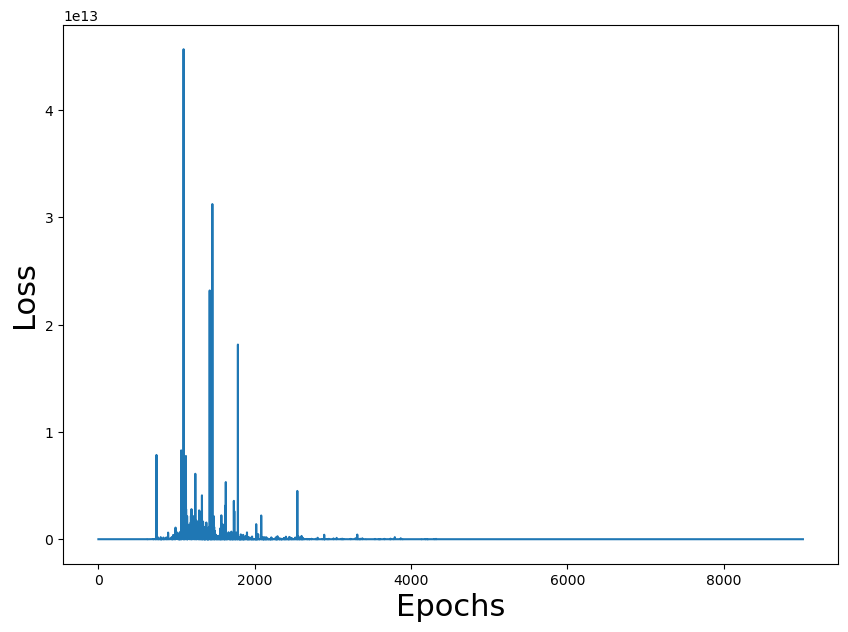

In [66]:
plt.figure(figsize=(10,7))
plt.plot(losses)
plt.xlabel("Epochs",fontsize=22)
plt.ylabel("Loss",fontsize=22)

In [67]:
df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023


In [68]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023


In [ ]:
df.to_csv('datasets/Adversarial_data_v5.csv' ,header=False,index=False)

In [46]:
df_test.to_csv('datasets/Adversarial_data_test_v8.csv' ,header=False,index=False)

In [ ]:
torch.save(model.state_dict(), 'DRL_MalwareMod_DeepMAL.sav')